In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import os 


In [4]:
bank = pd.read_excel('/Users/abdulraqeeb/Documents/DAE/BANK.xlsx')


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Campaign Performance Overview:

In [8]:
#total number of contacts 
total_contact = bank['contact'].count()
total_contact

4521

In [9]:
#average campaign duration 
avg_camp_duration = bank['campaign'].mean().round()
avg_camp_duration


3.0

In [10]:
# average subscription rate 
num_subscriptions = bank[bank['y'] == 'yes'].shape[0]
num_subscriptions

# total observation that is the co


521

In [11]:
total_observations = bank.shape[0]
total_observations

4521

In [12]:
## Calculate the average subscription rate
avg_subscription_rate = (num_subscriptions / total_observations)*100
avg_subscription_rate

11.523999115239992

# Customers Demographics

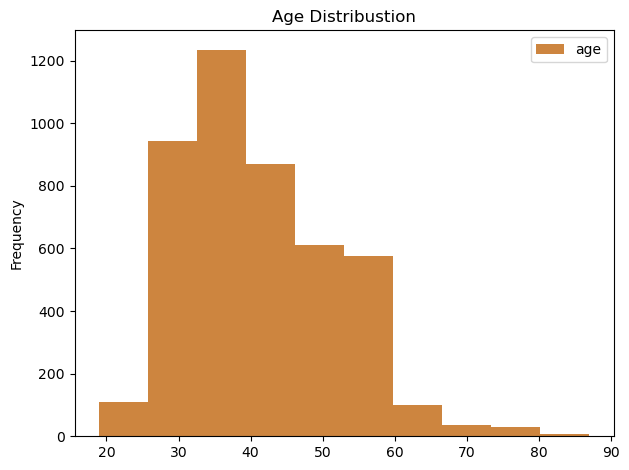

In [170]:
# plot showing age distribustion 
bank['age'].plot(kind='hist',color ='peru',stacked=False)
plt.title('Age Distribustion')
plt.tight_layout()
plt.show()

 # Monthly Campaign Trends:

In [14]:
#Create a line plot using matplotlib or seaborn to display the monthly trends in client contact 
#here we need the contact and month
bp = pd.DataFrame({
    'Months': bank['month'],
    'Contacts': bank['contact']
})

# Create a pivot table from bp, fixing the column names
bank_pot = bp.pivot_table(index='Months', columns='Contacts',aggfunc='size',fill_value=0)

bank_pot



Contacts,cellular,telephone,unknown
Months,,,
apr,276,17,0
aug,607,20,6
dec,18,2,0
feb,199,23,0
jan,129,18,1
jul,576,102,28
jun,73,8,450
mar,38,10,1
may,529,49,820


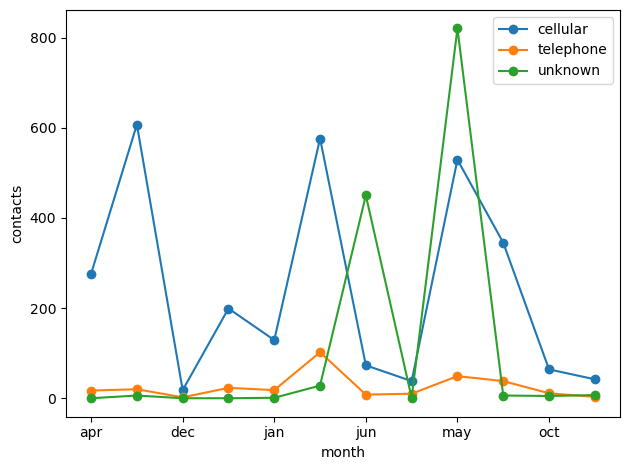

In [173]:
fig , ax = plt.subplots()

bank_pot.plot(ax=ax,marker='o')
plt.xlabel('month')
plt.ylabel('contacts')
plt.legend()
plt.tight_layout()
plt.show()



## Monthly Campaign Trends:

In [17]:
#Break down the subscription rates by month using a stacked area plot.
subscribtion_rate = pd.DataFrame({
    'Months': bank['month'],
    'subscribtionRate': bank['y']
})
SR_pivot = subscribtion_rate.pivot_table(index='Months', columns='subscribtionRate',aggfunc='size',fill_value=0)

SR_pivot

subscribtionRate,no,yes
Months,,
apr,237,56
aug,554,79
dec,11,9
feb,184,38
jan,132,16
jul,645,61
jun,476,55
mar,28,21
may,1305,93


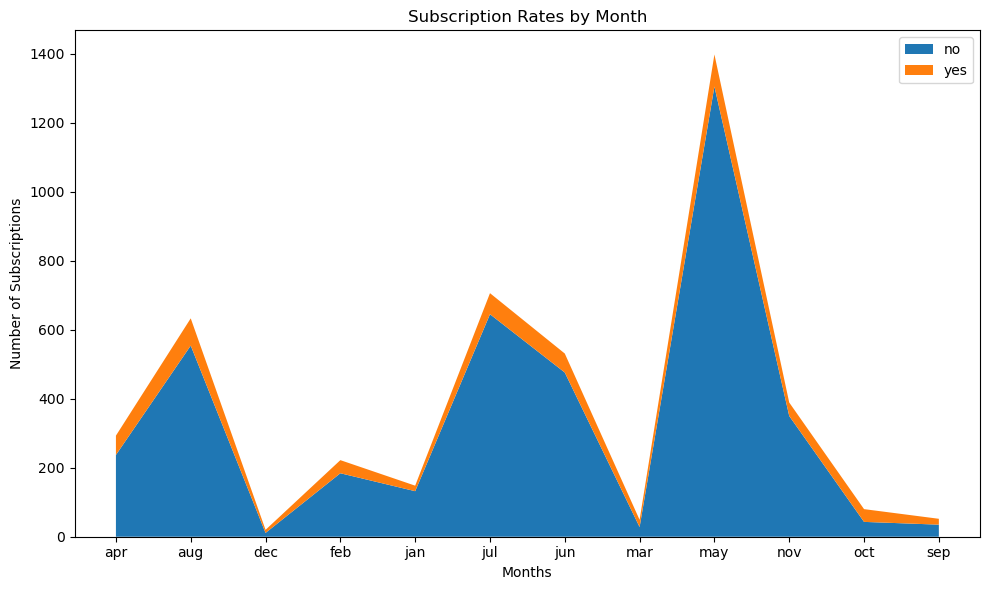

In [18]:
#lets plot a scatter plot for the subscribtion rate 
plt.figure(figsize=(10, 6))

plt.stackplot(SR_pivot.index, SR_pivot.T, labels=SR_pivot.columns)
# Adding labels and title
plt.legend()
plt.title('Subscription Rates by Month')
plt.xlabel('Months')
plt.ylabel('Number of Subscriptions')
plt.tight_layout()

# Display plot
plt.show()

# Client Demographics 

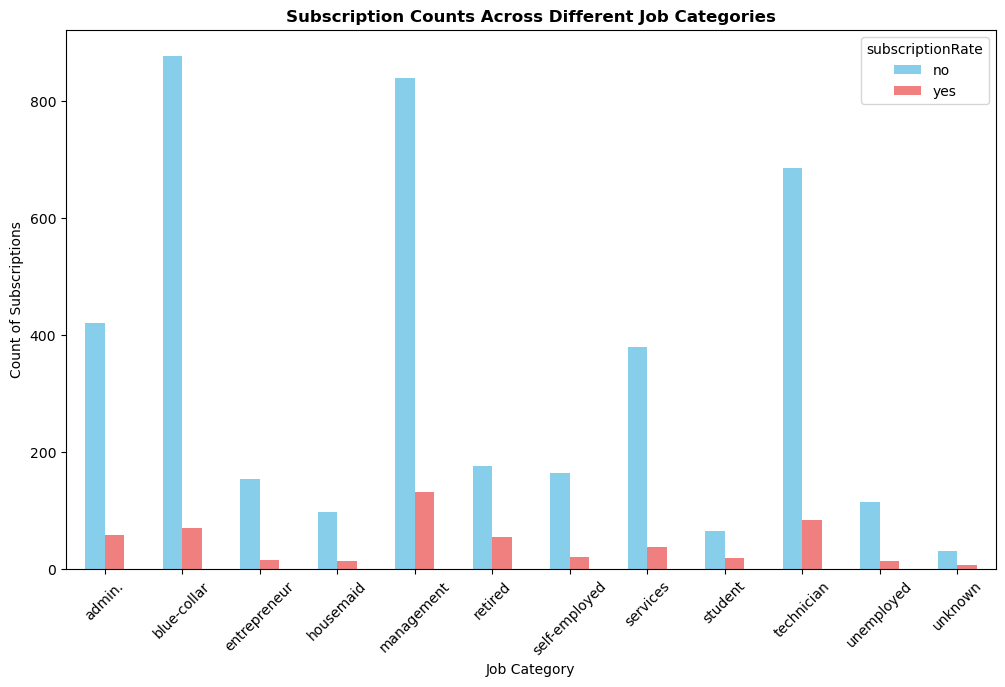

In [23]:
# Generate a bar plot to compare the subscription rates across different job categories.

# Create a DataFrame for job categories and subscription outcomes
job_categories = pd.DataFrame({
    'subscriptionRate': bank['y'],
    'JobCategory': bank['job']
})

# Calculate the count of yes and no subscriptions for each job category
subscription_counts = job_categories.groupby(['JobCategory', 'subscriptionRate']).size().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bar chart for 'yes' and 'no'
subscription_counts.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'lightcoral'])

# Adding labels and title
ax.set_xlabel('Job Category')
ax.set_ylabel('Count of Subscriptions')
ax.set_title('Subscription Counts Across Different Job Categories',fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


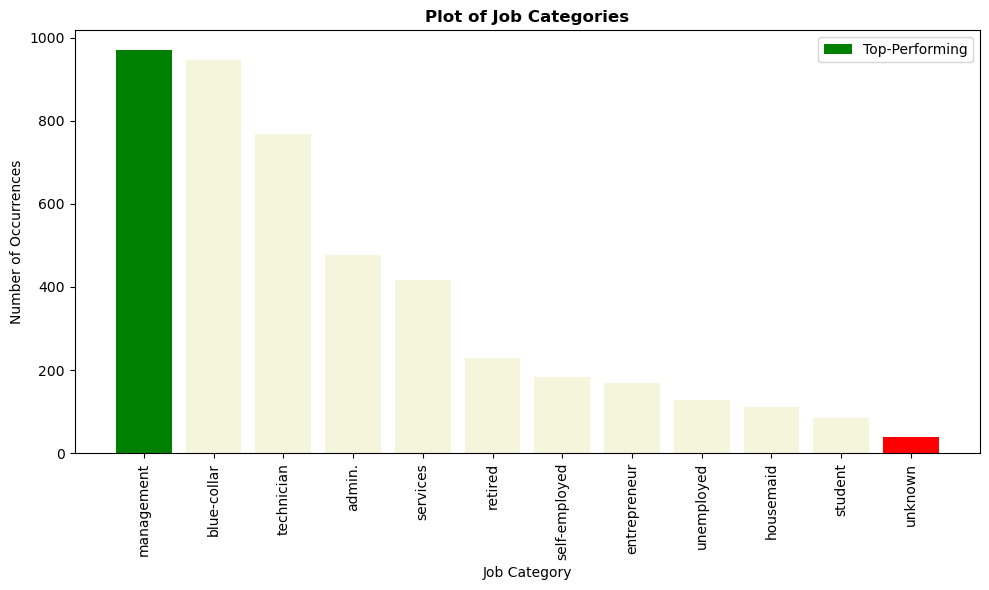

Top Performing Job Category: management with 969 occurrences.
Bottom Performing Job Category: unknown with 38 occurrences.


In [181]:
#Highlight the top-performing and bottom-performing job categories.
# Sample data from 'bank'
job_categories = pd.DataFrame({
    'subscribtionRate': bank['y'],
    'JobCategory': bank['job']
})

# Count occurrences of each job category
category_counts = job_categories['JobCategory'].value_counts()

# Identify the top and bottom-performing job categories
top_performing = category_counts.idxmax()  # Job category with the maximum count
bottom_performing = category_counts.idxmin()  # Job category with the minimum count

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Highlight colors: top (green), bottom (red), others (blue)
colors = ['green' if job == top_performing else 'red' if job == bottom_performing else 'beige' for job in category_counts.index]

# Plot the bar chart
ax.bar(category_counts.index, category_counts.values, color=colors, label='Job Categories')

# Adding labels and title
ax.set_xlabel('Job Category')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Plot of Job Categories',fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend and annotations
ax.legend(['Top-Performing', 'Bottom-Performing', 'Others'])

# Display the plot
plt.tight_layout()
plt.show()

# Print out the top and bottom performing categories
print(f"Top Performing Job Category: {top_performing} with {category_counts.max()} occurrences.")
print(f"Bottom Performing Job Category: {bottom_performing} with {category_counts.min()} occurrences.")

# Contact Duration Analysis:

In [26]:
#Create a scatter plot to analyze the relationship between contact duration and subscription success.
#Use data labels and color coding to highlight different job categories.

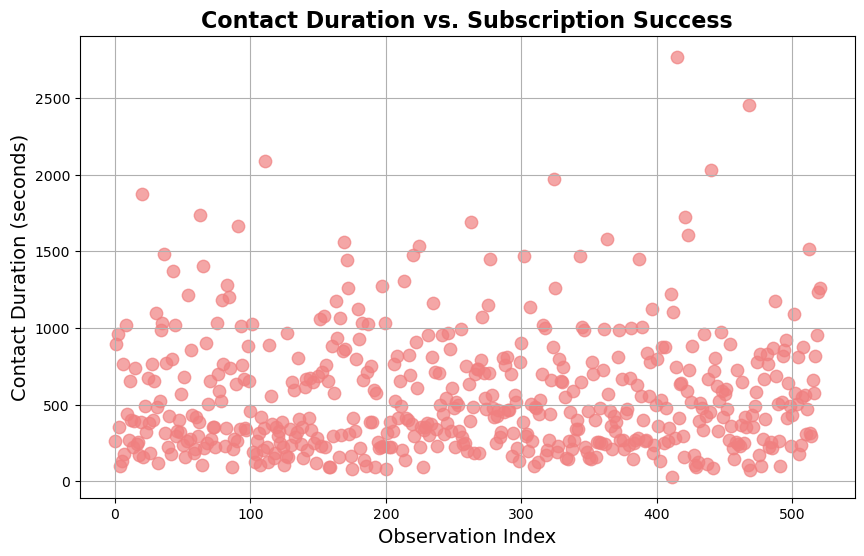

In [27]:
#Create a scatter plot to analyze the relationship between contact duration and subscription success.


# Create a DataFrame for contact duration and subscription success
relationship = pd.DataFrame({
    'contact_duration': bank[bank['y'] == 'yes']['duration'],  
    'subscription_success': bank[bank['y'] == 'yes']['y']
})

Duration = relationship['contact_duration']
x_values = range(len(Duration))

# Plot with improved aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(x_values, Duration, color='lightcoral', edgecolor='lightcoral', alpha=0.7, s=80)

# Adding labels and title
plt.title('Contact Duration vs. Subscription Success', fontsize=16, fontweight='bold')
plt.xlabel('Observation Index', fontsize=14)
plt.ylabel('Contact Duration (seconds)', fontsize=14)

plt.grid()

# Show the plot
plt.show()


# Client Segment Analysis:

In [104]:
#Calculate the subscription rates for different age groups and education levels.

# Define age groups (bins) and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Bins from 0 to 100 years
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Add a new column for age groups
bank['age_group'] = pd.cut(bank['age'], bins=age_bins, labels=age_labels, right=False,)

# Group by age group and education level, then calculate subscription rates
subscription_rates = bank.groupby(['age_group', 'education'])['y'].apply(lambda x: (x == 'yes').count()).reset_index(name='subscription_rate')

# Sort the results for better readability
subscription_rates.sort_values(by=['age_group', 'education'])

# Show the results
subscription_rates




,age_group,education,subscription_rate
0,<20,primary,1.0
1,<20,secondary,1.0
2,<20,tertiary,NaN
3,<20,unknown,2.0
4,20-29,primary,25.0
5,20-29,secondary,301.0
6,20-29,tertiary,135.0
7,20-29,unknown,17.0
8,30-39,primary,158.0
9,30-39,secondary,948.0


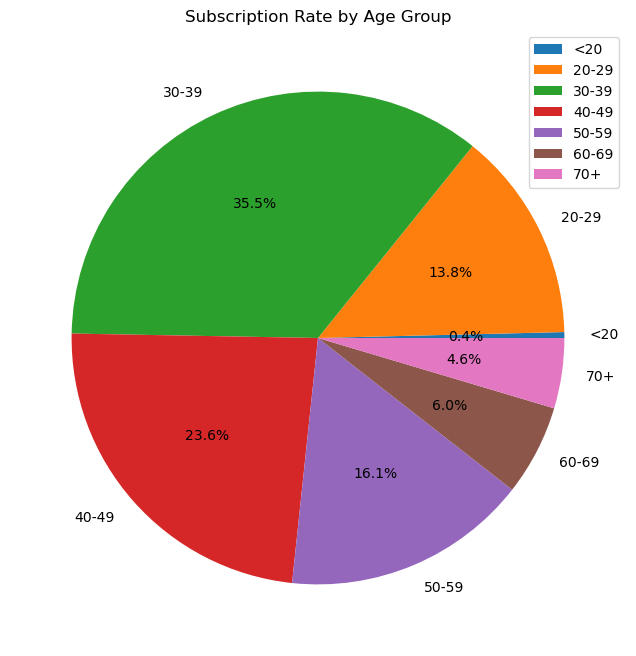

In [112]:
#Use a pie chart to visualize the contribution of each segment to the overall subscription rate.

# Calculate the number of 'yes' subscriptions for each age group and education level
subscription_counts = bank.groupby(['age_group', 'education'])['y'].apply(lambda x: (x == 'yes').sum()).reset_index(name='subscription_count')

# Prepare the data for the pie chart by summing the counts across education levels for each age group
age_group_totals = subscription_counts.groupby('age_group')['subscription_count'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%')#, startangle=140)
plt.title('Subscription Rate by Age Group')
plt.legend()
plt.show()


## Project Abstract

# Abstract



This document presents an analysis of customer subscription data derived from a bank's marketing campaign. The study focuses on understanding the factors that influence subscription outcomes and offers actionable insights to improve subscription rates. The dataset, obtained from the Data Analytics Elites association, includes key customer demographics, contact details, and subscription outcomes. Data preprocessing was carried out using Excel for cleaning and formatting, followed by further analysis in Python using pandas and Matplotlib. Key findings include a modest subscription rate of 11.5%, significant engagement among the 35-40 age group, and higher subscription rates in blue-collar occupations. The study highlights the importance of targeted marketing strategies and identifies areas for improving data quality and campaign effectiveness.